In [49]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# import csv file and save as dataframe
weather_df = pd.read_csv("uber_nyc_enriched.csv")
weather_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [50]:
# rename columns
weather_df = weather_df.rename(columns = {"pickup_dt": "Pickup Date",
                                          "borough": "Borough",
                                          "pickups": "Pickups",
                                          "spd": "Wind Speed (MPH)",
                                          "vsb": "Visibility (Miles)",
                                          "temp": "Temperature (F)",
                                          "dewp": "Dewpoint",
                                          "slp": "Sea Level Pressure",
                                          "pcp01": "1 Hour Precipitation",
                                          "pcp06": "6 Hour Precipitation",
                                          "pcp24": "24 Hour Precipitation",
                                          "sd": "Snow Depth (inches)",
                                          "hday": "Holiday"})
weather_df.head()

,Pickup Date,Borough,Pickups,Wind Speed (MPH),Visibility (Miles),Temperature (F),Dewpoint,Sea Level Pressure,1 Hour Precipitation,6 Hour Precipitation,24 Hour Precipitation,Snow Depth (inches),Holiday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [51]:
# make pickup dataframe based on bad wind

# arbitrary cutoffs for inclement weather: wind > 20 mph, temp < 40 or temp > 85, 24 hour precip >= 1, snow depth >= 2
bad_wind_df = weather_df.dropna()

bad_wind_df = bad_wind_df.loc[(bad_wind_df["Wind Speed (MPH)"] >= 20)]

bad_wind_df = bad_wind_df.dropna()
len(bad_wind_df)

36

In [52]:
# create bad temperature dataframes
bad_hitemp_df = weather_df.dropna()
bad_lotemp_df = weather_df.dropna()

bad_hitemp_df = bad_hitemp_df.loc[(bad_hitemp_df["Temperature (F)"] >= 85)]
bad_lotemp_df = bad_lotemp_df.loc[(bad_lotemp_df["Temperature (F)"] <= 40)]

# append high temp and low temp dataframes creating bad temp dataframe
bad_temp_df = bad_hitemp_df.append(bad_lotemp_df)
len(bad_temp_df)

11298

In [53]:
# create bad precipitation dataframe
bad_precip_df = weather_df.dropna()

bad_precip_df = bad_precip_df.loc[(bad_precip_df["24 Hour Precipitation"] >= 1)]
len(bad_precip_df)

318

In [54]:
# create bad snow weather dataframe
bad_snow_df = weather_df.dropna()

bad_snow_df = bad_snow_df.loc[(bad_snow_df["Snow Depth (inches)"] >= 2)]
len(bad_snow_df)

6966

In [55]:
# append all the bad weather dataframes
bad_weather_df = bad_wind_df.append([bad_temp_df, bad_precip_df, bad_snow_df])
bad_weather_df = bad_weather_df.drop_duplicates()
len(bad_weather_df)

12396

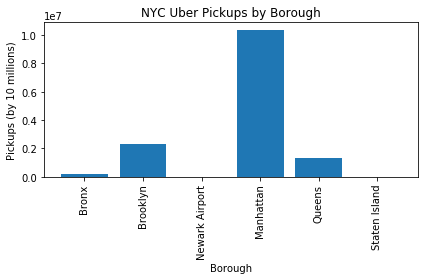

In [56]:
# bar chart for whole dataset

# group initial dataframe by boroughs and set axes for chart
weather_groups = weather_df.groupby("Borough")
x_axis = np.arange(len(weather_groups))
pickups = weather_groups["Pickups"].sum()

# create bar chart
plt.bar(x_axis, pickups)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"], rotation="vertical")
plt.title("NYC Uber Pickups by Borough")
plt.xlabel("Borough")
plt.ylabel("Pickups (by 10 millions)")
plt.tight_layout()
plt.show()

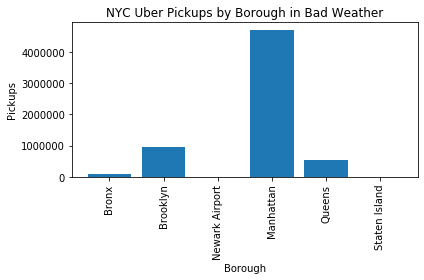

In [57]:
# bar chart for boroughs in bad weather

# group bad weather dataframe by boroughs
bad_weather_groups = bad_weather_df.groupby("Borough")
x_axis = np.arange(len(bad_weather_groups))
pickups = bad_weather_groups["Pickups"].sum()

# create bar chart
plt.bar(x_axis, pickups)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"], rotation="vertical")
plt.title("NYC Uber Pickups by Borough in Bad Weather")
plt.xlabel("Borough")
plt.ylabel("Pickups")
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x270fae75780>,
 [Text(3.2961227825485495, 0.15992061269395377, 'Bronx'),
  Text(2.7080111925974553, 1.8859149982878094, 'Brooklyn'),
  Text(1.4386343052725548, 2.9699042637251716, 'Newark Airport'),
  Text(-3.2353907656197345, -0.8687615286961946, 'Manhattan'),
  Text(3.1535204413149014, -0.9722699348478643, 'Queens'),
  Text(3.299996124516616, -0.0050574870554697384, 'Staten Island')],
 [Text(1.7978851541173901, 0.08722942510579296, '1.5%'),
  Text(1.4770970141440662, 1.0286809081569868, '16.3%'),
  Text(0.784709621057757, 1.6199477802137296, '0.0%'),
  Text(-1.786708333252689, -0.47976382927998795, '72.7%'),
  Text(1.7201020588990368, -0.5303290553715623, '9.4%'),
  Text(1.799997886099972, -0.002758629302983493, '0.0%')])

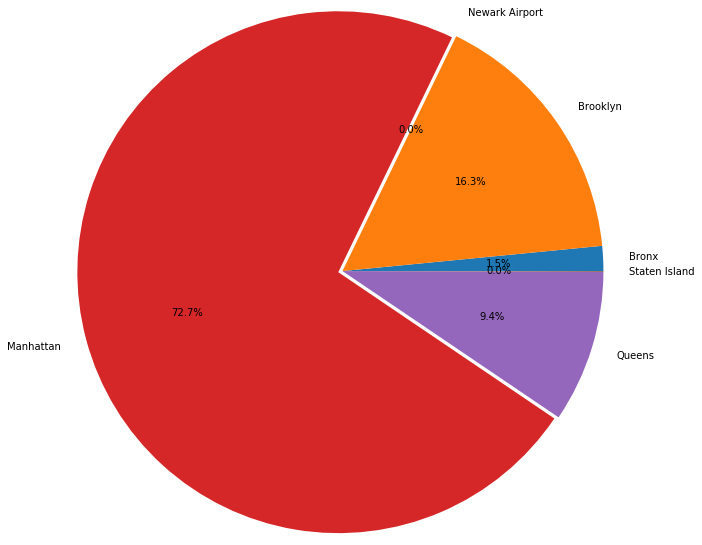

In [58]:
# create pie chart for whole data set

labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black"]
pickups = weather_groups["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups, explode=explode, labels = labels, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x270faec4eb8>,
 [Text(3.2961227825485495, 0.15992061269395377, 'Bronx'),
  Text(2.7080111925974553, 1.8859149982878094, 'Brooklyn'),
  Text(1.4386343052725548, 2.9699042637251716, 'Newark Airport'),
  Text(-3.2353907656197345, -0.8687615286961946, 'Manhattan'),
  Text(3.1535204413149014, -0.9722699348478643, 'Queens'),
  Text(3.299996124516616, -0.0050574870554697384, 'Staten Island')],
 [Text(1.7978851541173901, 0.08722942510579296, '1.5%'),
  Text(1.4770970141440662, 1.0286809081569868, '16.3%'),
  Text(0.784709621057757, 1.6199477802137296, '0.0%'),
  Text(-1.786708333252689, -0.47976382927998795, '72.7%'),
  Text(1.7201020588990368, -0.5303290553715623, '9.4%'),
  Text(1.799997886099972, -0.002758629302983493, '0.0%')])

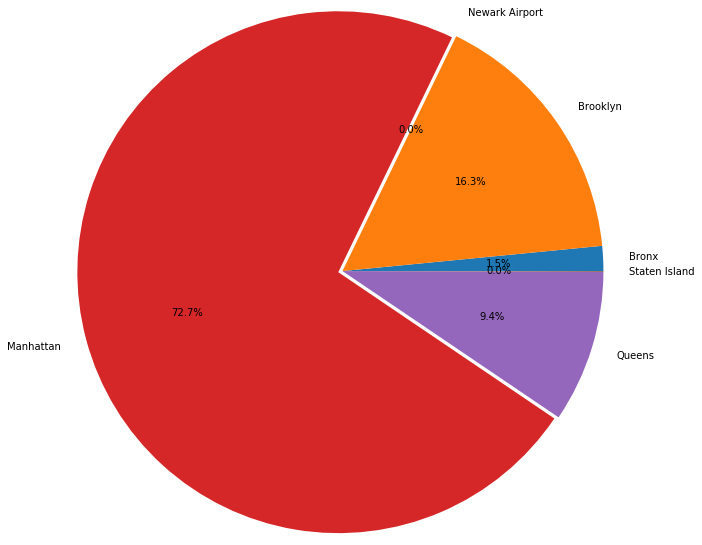

In [59]:
# create pie chart for bad weather data set

labels = labels = ["Bronx", "Brooklyn", "Newark Airport", "Manhattan", "Queens", "Staten Island"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "black"]
pickups_weather = bad_weather_groups["Pickups"].sum()
explode = [0,0,0,.05,0,0]
plt.pie(pickups, explode=explode, labels = labels, autopct = "%1.1f%%", radius = 3)

In [60]:
stats.ttest_ind(pickups, pickups_weather, equal_var = False)

# pvalue of 48.5% indicates that the discrepancies in data are mostly due to data randomness, therefore weather does NOT
# seem to be an influence on where people are going to be picked up

# still want to work on gross pickups vs bad weather pickups and compare usage rates

Ttest_indResult(statistic=0.7371651556664048, pvalue=0.48503783358224295)